<a href="https://colab.research.google.com/github/V-Martyanov/reviews/blob/main/24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import imdb

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # получаем данные

17464789/17464789 [==============================] - 0s 0us/step


In [5]:
train_data[123] # один отзыв, который состоит из индексов, по которым подбираются слова 

[1,
 307,
 5,
 1301,
 20,
 1026,
 2511,
 87,
 2775,
 52,
 116,
 5,
 31,
 7,
 4,
 91,
 1220,
 102,
 13,
 28,
 110,
 11,
 6,
 137,
 13,
 115,
 219,
 141,
 35,
 221,
 956,
 54,
 13,
 16,
 11,
 2714,
 61,
 322,
 423,
 12,
 38,
 76,
 59,
 1803,
 72,
 8,
 2,
 23,
 5,
 967,
 12,
 38,
 85,
 62,
 358,
 99]

ДЗ

In [6]:
n = "1 307 5 1301 20 1026 2511 87 2775 52 116 5 31 7 4 91 1220 102 13 28 110 11 6 137 13 115 219 141 35 221 956 54 13 16 11 2714 61 322 423 12 38 76 59 1803 72 8 2 23 5 967 12 38 85 62 358 99"

In [7]:
t = ""
newN = []
for i in n:
  if i != " ":
    t+=i
  else:
    newN.append(int(t))
    t=""

In [8]:
newN # либо через split()

[1,
 307,
 5,
 1301,
 20,
 1026,
 2511,
 87,
 2775,
 52,
 116,
 5,
 31,
 7,
 4,
 91,
 1220,
 102,
 13,
 28,
 110,
 11,
 6,
 137,
 13,
 115,
 219,
 141,
 35,
 221,
 956,
 54,
 13,
 16,
 11,
 2714,
 61,
 322,
 423,
 12,
 38,
 76,
 59,
 1803,
 72,
 8,
 2,
 23,
 5,
 967,
 12,
 38,
 85,
 62,
 358]

In [9]:
train_labels[0] # значения отзыва, 1 - положительный, 0 - отрицательный 

1

In [10]:
word_index=imdb.get_word_index() # получения словаря (слово, индекс)

1641221/1641221 [==============================] - 0s 0us/step


In [11]:
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()]) # переворачивания словар (индекс, слово)

In [12]:
reverse_word_index[1] # демонстрация, перевернутого словоря(словарь отсортировон по частоте использования слов)

'the'

In [13]:
decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]]) # демонстрация подстановки вместо индекса слова

In [14]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [15]:
import numpy as np # подготовка данных для нашей модели
def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results
x_train=vectorize_sequences(train_data) # тренировочные данные для модели
x_test=vectorize_sequences(test_data) # настоящие данные

In [16]:
y_train = np.asarray(train_labels).astype("float32") # перевод в массиввы
y_test = np.asarray(test_labels).astype("float32")

In [17]:
x_train # демонстрация

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [18]:
y_train # демонстрация

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [19]:
from keras import models
from keras import layers
model = models.Sequential() # начало создание
model.add(layers.Dense(16 # кол-во нейронов
                       , activation="relu" # функция активации
                       , input_shape=(10000,) # кол-во взодных данных
                       )) # первый слой
model.add(layers.Dense(16, activation="relu")) # второй слой
model.add(layers.Dense(1, activation="sigmoid")) # третий слой

In [20]:
model.compile(optimizer="rmsprop", # это метод достижения лучших результатов
              loss="binary_crossentropy", # функция потерь
              metrics=["accuracy"])# Она показывает количество правильно проставленных 
#меток класса (истинно положительных и истинно отрицательных) от общего количества данных

In [21]:
# подготовка данных для обучения модели
x_val = x_train[10000:]
y_val = y_train[10000:]
# выборка данных для валидации
x_valid = x_train[:10000]
y_valid = y_train[:10000]

In [22]:
history = model.fit(x_val,
                    y_val,
                    epochs=20,# кол-во эпох(циклов работы нашей схемы)
                    batch_size=512,
                    validation_data=(x_valid,y_valid)# валидация данных - определение на сколько успешна построенная модель
                    )

Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.5074 - accuracy: 0.7747 - val_loss: 0.4089 - val_accuracy: 0.8325
Epoch 2/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2939 - accuracy: 0.9041 - val_loss: 0.3054 - val_accuracy: 0.8819
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2138 - accuracy: 0.9279 - val_loss: 0.2772 - val_accuracy: 0.8908
Epoch 4/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1666 - accuracy: 0.9460 - val_loss: 0.3068 - val_accuracy: 0.8787
Epoch 5/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1358 - accuracy: 0.9579 - val_loss: 0.2857 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1084 - accuracy: 0.9674 - val_loss: 0.3114 - val_accuracy: 0.8842
Epoch 7/20
30/30 [==============================] - 1s 47ms/step - loss: 0.0911 - accuracy: 0.9729 - val_loss: 0.3177 - val_accuracy: 0.8821
Epoch 8/20
30

In [23]:
history_d = history.history  # получения словаря данных с помощью метода history

In [24]:
import numpy as np

In [25]:
history_d.keys() # что у нас за ключи
# loss - потери данных
# accuracy - точность предсказания
# 'val_loss', 'val_accuracy' - валидационные данные

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

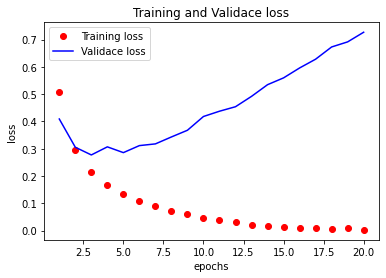

In [26]:
# это должно быть знакомо, по ключам и эпохам строим наш график
# эпоха - занчения "loss" и "val_loss"
import matplotlib.pyplot as plt
# получаем данные на основе нашего обучения
loss_values=history_d["loss"]
val_loss_values=history_d["val_loss"]
# создание list который будет показывать сегменты на оси ох
epochs = range(1, len(history_d["accuracy"]) + 1)
# первый график для 
plt.plot(epochs,loss_values,"ro", label="Training loss")
# второй
plt.plot(epochs,val_loss_values,"b", label="Validace loss")
plt.title("Training and Validace loss")
# метка по ох
plt.xlabel("epochs")
# метка по оу
plt.ylabel("loss")
plt.legend()
# демонстрация
plt.show()

3